# Análisis de datos
# *Notebook de lluvias y temperaturas en México*
## Ana Isabel Moreno Hernández
### NUA: 434232

- Importamos librerías.

In [2]:
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
import os
import math
import scipy.stats
%matplotlib inline
plt.style.use('fivethirtyeight')

- Datos:

In [10]:
# Datos de temperatura y precipitación
temp_minima_2019 = pd.read_csv('temp_minima_2019.csv', encoding='latin-1')
temp_media_2019 = pd.read_csv('temp_media_2019.csv', encoding='latin-1')
temp_maxima_2019 = pd.read_csv('temp_maxima_2019.csv', encoding='latin-1')

temp_minima_2018 = pd.read_csv('temp_minima_2018.csv',encoding='latin-1')
temp_media_2018 = pd.read_csv('temp_media_2018.csv',encoding='latin-1')
temp_maxima_2018 = pd.read_csv('temp_maxima_2018.csv',encoding='latin-1')

## **Apartado 1**
### - Distribución de temperaturas

### **Apartado 1.1**

- Promedio, desviaciones estándar, media, moda de la distribución. Rango interquartil de la distribución. 

In [11]:
anio = {1: 2018, 2: 2018, 3: 2018, 4: 2019, 5: 2019, 6: 2019}
temp = {1: 'Tmin', 2: 'Tmed', 3:'Tmax', 4: 'Tmin', 5: 'Tmed', 6:'Tmax'}
promedio = {1: temp_minima_2018['Tmin'].mean(), 2: temp_media_2018['Tmed'].mean(), 
           3: temp_maxima_2018['Tmax'].mean(), 4: temp_minima_2019['Tmin'].mean(),
           5: temp_media_2019['Tmed'].mean(), 6: temp_maxima_2019['Tmax'].mean()}
std = {1: temp_minima_2018['Tmin'].std(), 2: temp_media_2018['Tmed'].std(), 
           3: temp_maxima_2018['Tmax'].std(), 4: temp_minima_2019['Tmin'].std(),
           5: temp_media_2019['Tmed'].std(), 6: temp_maxima_2019['Tmax'].std()}
median = {1: temp_minima_2018['Tmin'].median(), 2: temp_media_2018['Tmed'].median(), 
           3: temp_maxima_2018['Tmax'].median(), 4: temp_minima_2019['Tmin'].median(),
           5: temp_media_2019['Tmed'].median(), 6: temp_maxima_2019['Tmax'].median()}
mode = {1: temp_minima_2018['Tmin'].mode(), 2: temp_media_2018['Tmed'].mode(), 
           3: temp_maxima_2018['Tmax'].mode(), 4: temp_minima_2019['Tmin'].mode(),
           5: temp_media_2019['Tmed'].mode(), 6: temp_maxima_2019['Tmax'].mode()}
percent25 = {1: temp_minima_2018.describe().loc['25%']['Tmin'], 2: temp_media_2018.describe().loc['25%']['Tmed'], 
           3: temp_maxima_2018.describe().loc['25%']['Tmax'], 4: temp_minima_2019.describe().loc['25%']['Tmin'],
           5: temp_media_2019.describe().loc['25%']['Tmed'], 6: temp_maxima_2019.describe().loc['25%']['Tmax']}
percent50 = {1: temp_minima_2018.describe().loc['50%']['Tmin'], 2: temp_media_2018.describe().loc['50%']['Tmed'], 
           3: temp_maxima_2018.describe().loc['50%']['Tmax'], 4: temp_minima_2019.describe().loc['50%']['Tmin'],
           5: temp_media_2019.describe().loc['50%']['Tmed'], 6: temp_maxima_2019.describe().loc['50%']['Tmax']}
percent75 = {1: temp_minima_2018.describe().loc['75%']['Tmin'], 2: temp_media_2018.describe().loc['75%']['Tmed'], 
           3: temp_maxima_2018.describe().loc['75%']['Tmax'], 4: temp_minima_2019.describe().loc['75%']['Tmin'],
           5: temp_media_2019.describe().loc['75%']['Tmed'], 6: temp_maxima_2019.describe().loc['75%']['Tmax']}

In [12]:
data = pd.DataFrame({'Año': anio,
                    'Nivel': temp,
                    'Promedio': promedio,
                    'std': std,
                    'Mediana': median,
                    'Moda': mode,
                    '25%': percent25,
                    '50%': percent50,
                    '75%': percent75})
data

,Año,Nivel,Promedio,std,Mediana,Moda,25%,50%,75%
1,2018,Tmin,8.372247,6.170696,7.500000,0 4.8 1 5.4 2 5.6 3 7.2 dtype: flo...,3.850000,7.500000,12.750000
2,2018,Tmed,16.379527,4.960928,15.800000,0 12.6 dtype: float64,12.550000,15.800000,20.600000
3,2018,Tmax,24.383076,4.606409,24.000000,0 24.1 dtype: float64,21.000000,24.000000,27.500000
4,2019,Tmin,9.812221,5.941190,8.937345,0 7.387097 dtype: float64,5.350806,8.937345,15.128017
5,2019,Tmed,17.444502,4.738147,16.516129,0 15.387097 1 22.435484 dtype: float64,13.937570,16.516129,21.467742
6,2019,Tmax,24.992289,4.434152,24.657766,0 22.0 dtype: float64,21.838710,24.657766,27.931452


### **Apartado 1.2**

Y el promedio, la desviación estándar, la mediana, la moda y los rangos interquartiles en cada nivel de temperatura sin importar el año los calculamos con los siguientes comandos:

In [14]:
tempa = {1: 'Tmin', 2: 'Tmed', 3: 'Tmax'}

arreglo1 = temp_minima_2018['Tmin'].append(temp_minima_2019['Tmin'])
arreglo2 = temp_media_2018['Tmed'].append(temp_media_2019['Tmed'])
arreglo3 = temp_maxima_2018['Tmax'].append(temp_maxima_2019['Tmax'])

promedioa = {1: arreglo1.describe().loc['mean'],
            2: arreglo2.describe().loc['mean'], 
           3: arreglo3.describe().loc['mean']}

stda = {1: arreglo1.describe().loc['std'],
            2: arreglo2.describe().loc['std'], 
           3: arreglo3.describe().loc['std']}

medianaa = {1: arreglo1.median(),
            2: arreglo2.median(), 
           3: arreglo3.median()}

modaa = {1: arreglo1.mode(),
            2: arreglo2.mode(), 
           3: arreglo3.mode()}

percent25a = {1: arreglo1.describe().loc['25%'],
            2: arreglo2.describe().loc['25%'], 
           3: arreglo3.describe().loc['25%']}

percent50a = {1: arreglo1.describe().loc['50%'],
            2: arreglo2.describe().loc['50%'], 
           3: arreglo3.describe().loc['50%']}

percent75a = {1: arreglo1.describe().loc['75%'],
            2: arreglo2.describe().loc['75%'], 
           3: arreglo3.describe().loc['75%']}

data2 = pd.DataFrame({'Nivel': tempa,
                    'Promedio': promedioa,
                    'std': stda,
                    'Mediana': medianaa,
                    'Moda': modaa,
                    '25%': percent25a,
                    '50%': percent50a,
                    '75%': percent75a})
data2

,Nivel,Promedio,std,Mediana,Moda,25%,50%,75%
1,Tmin,8.912544,6.123740,8.000000,0 2.5 1 4.8 2 5.4 3 5.6 4 7.2 d...,4.3,8.000000,13.9
2,Tmed,16.769526,4.906068,16.068548,0 12.6 dtype: float64,13.0,16.068548,20.8
3,Tmax,24.624620,4.547447,24.200000,0 24.1 dtype: float64,21.4,24.200000,27.6


### **Apartado 1.3**
- Diferencia en el promedio de las temperaturas máxima, mínima y  media entre 2018 y 2019.

In [16]:
promedio2018 = {'Tmin': temp_minima_2018['Tmin'].mean(), 'Tmed': temp_media_2018['Tmed'].mean(), 
           'Tmax': temp_maxima_2018['Tmax'].mean()}
promedio2019 = { 'Tmin': temp_minima_2019['Tmin'].mean(),
           'Tmed': temp_media_2019['Tmed'].mean(),'Tmax': temp_maxima_2019['Tmax'].mean()}

In [18]:
data3 = pd.DataFrame({'Promedio 2018': promedio2018,
                    'Promedio 2019': promedio2019})
data3['Diferencia'] = data3['Promedio 2019']-data3['Promedio 2018']
data3

,Promedio 2018,Promedio 2019,Diferencia
Tmin,8.372247,9.812221,1.439973
Tmed,16.379527,17.444502,1.064975
Tmax,24.383076,24.992289,0.609213


## **Apartado 2**

### - Lluvias y precipitaciones

- Datos

In [20]:
lluvias_2019_ene = pd.read_csv('201901010000Lluv.csv', encoding='latin-1')
lluvias_2019_feb = pd.read_csv('201902010000Lluv.csv', encoding='latin-1')
lluvias_2019_mar = pd.read_csv('201903010000Lluv.csv', encoding='latin-1')
lluvias_2019_abr = pd.read_csv('201904010000Lluv.csv', encoding='latin-1')
lluvias_2019_may = pd.read_csv('201905010000Lluv.csv', encoding='latin-1')
lluvias_2019_jun = pd.read_csv('201906010000Lluv.csv', encoding='latin-1')
lluvias_2019_jul = pd.read_csv('201907010000Lluv.csv', encoding='latin-1')
lluvias_2019_ago = pd.read_csv('201908010000Lluv.csv', encoding='latin-1')

lluvias_2018_ene = pd.read_csv('201801010000Lluv.csv', encoding='latin-1')
lluvias_2018_feb = pd.read_csv('201802010000Lluv.csv', encoding='latin-1')
lluvias_2018_mar = pd.read_csv('201803010000Lluv.csv', encoding='latin-1')
lluvias_2018_abr = pd.read_csv('201804010000Lluv.csv', encoding='latin-1')
lluvias_2018_may = pd.read_csv('201805010000Lluv.csv', encoding='latin-1')
lluvias_2018_jun = pd.read_csv('201806010000Lluv.csv', encoding='latin-1')
lluvias_2018_jul = pd.read_csv('201807010000Lluv.csv', encoding='latin-1')
lluvias_2018_ago = pd.read_csv('201808010000Lluv.csv', encoding='latin-1')

In [32]:
lluvias_2019 = pd.merge(lluvias_2019_ene, lluvias_2019_feb)
lluvias_2019 = pd.merge(lluvias_2019, lluvias_2019_mar)
lluvias_2019 = pd.merge(lluvias_2019, lluvias_2019_abr)
lluvias_2019 = pd.merge(lluvias_2019, lluvias_2019_may)
lluvias_2019 = pd.merge(lluvias_2019, lluvias_2019_jun)

lluvias_2019_jul = lluvias_2019_jul.rename(columns = {'ESTACION': 'NOMBRE'})
lluvias_2019_jul = lluvias_2019_jul.rename(columns = {'CLAVE': 'CLAVE_SIH'})
lluvias_2019_ago = lluvias_2019_ago.rename(columns = {'ESTACION': 'NOMBRE'})
lluvias_2019_ago = lluvias_2019_ago.rename(columns = {'CLAVE': 'CLAVE_SIH'})

lluvias_2019 = pd.merge(lluvias_2019, lluvias_2019_jul)
lluvias_2019 = pd.merge(lluvias_2019, lluvias_2019_ago)

In [33]:
lluvias_2019

,LON,LAT,EDO,CLAVE_SIH,NOMBRE,ENE,FEB,MAR,ABR,MAY,JUN,JUL,AGO
0,-102.712222,21.849167,AGS,CALVILLO,"Calvillo, Ags. SMN*",18.17,0.00,0.00,0.0,5.32,101.27,18.3,105.47
1,-102.676944,21.997500,AGS,CDRAG,"La Codorniz, Ags.",16.70,0.00,0.00,0.0,0.00,35.00,139.0,156.30
2,-102.000000,21.896389,AGS,CNSAG,"Los Conos, Ags.",13.20,0.00,2.31,0.0,3.22,46.72,100.4,160.73
3,-102.296667,22.362778,AGS,CSOAG,"Cosío, Ags.",7.20,0.00,0.30,0.0,12.00,17.28,39.3,40.33
4,-102.356944,22.121667,AGS,JCQAG,"Jocoque, Ags.",6.30,0.00,0.00,0.0,5.00,24.32,43.1,108.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...
983,-102.864167,22.120556,ZAC,TAYZC,"Ing. Julián Adame Alatorre, Zac.",13.50,0.00,0.00,0.0,0.00,61.11,110.1,94.62
984,-103.879722,23.471944,ZAC,TCHZC,"Chalchihuites, Zac.",3.00,0.00,0.00,0.0,4.00,63.00,173.0,72.00
985,-103.309444,21.773611,ZAC,TLLZC,"Tlaltenango, Zac.",14.02,0.01,0.40,0.0,0.02,65.43,227.8,112.91
986,-101.715833,22.347500,ZAC,VHGZC,"Villa Hidalgo, Zac.",9.70,2.50,4.01,0.0,4.51,49.30,72.4,69.70


In [79]:
lluvias_2018_ene = lluvias_2018_ene.rename(columns = {'ESTADO': 'EDO'})
lluvias_2018_feb = lluvias_2018_feb.rename(columns = {'ESTADO': 'EDO'})

lluvias_2018 = pd.merge(lluvias_2018_ene, lluvias_2018_feb)
lluvias_2018 = pd.merge(lluvias_2018, lluvias_2018_mar)
lluvias_2018 = pd.merge(lluvias_2018, lluvias_2018_abr)
lluvias_2018 = pd.merge(lluvias_2018, lluvias_2018_may)
lluvias_2018 = pd.merge(lluvias_2018, lluvias_2018_jun)
lluvias_2018 = pd.merge(lluvias_2018, lluvias_2018_jul)
lluvias_2018 = pd.merge(lluvias_2018, lluvias_2018_ago)

lluvias_2018 = lluvias_2018.drop(['Unnamed: 6'], axis = 1)
lluvias_2018 = lluvias_2018.drop(['Unnamed: 7'], axis = 1)
lluvias_2018 = lluvias_2018.drop(['Unnamed: 8'], axis = 1)
lluvias_2018 = lluvias_2018.drop(['Unnamed: 9'], axis = 1)
lluvias_2018 = lluvias_2018.drop(['Unnamed: 10'], axis = 1)

In [80]:
lluvias_2018

,LON,LAT,EDO,CLAVE_SIH,NOMBRE,ENE,FEB,MAR,ABR,MAY,JUN,JUL,AGO
0,-102.309722,21.895000,AGS,AGSAG,"Aguascalientes, Ags.",25.8,28.7,0.00,0.0,75.4,112.50,34.5,128.2
1,-102.466944,22.188611,AGS,ANVAG,"Cincuenta Aniversario, Ags.",58.6,24.4,0.00,2.6,34.8,191.20,28.8,63.4
2,-102.712222,21.849167,AGS,CALVILLO,"Calvillo, Ags. SMN*",56.0,19.5,0.00,5.3,15.4,201.50,108.0,78.3
3,-102.676944,21.997500,AGS,CDRAG,"La Codorniz, Ags.",50.0,30.0,0.00,0.0,39.0,250.00,110.5,80.4
4,-102.000000,21.896389,AGS,CNSAG,"Los Conos, Ags.",51.5,33.0,0.01,106.3,39.0,289.11,64.4,129.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,-103.636667,23.638889,ZAC,SOMZC,"Sombrerete, Zac.",8.2,20.9,0.30,3.5,24.8,77.90,64.4,105.0
698,-103.495833,22.326667,ZAC,STEZC,"Santa Teresa (Independencia Nacional), Zac.",27.9,17.1,0.00,1.0,21.6,176.10,95.8,108.3
699,-103.108889,22.923611,ZAC,STRZC,"Santa Rosa, Zac.",25.5,53.0,0.01,0.0,79.2,105.02,53.6,106.2
700,-103.879722,23.471944,ZAC,TCHZC,"Chalchihuites, Zac.",6.0,22.0,0.00,1.0,9.5,112.70,143.5,118.5


### **Apartado 2.1**
- Diferencia entre la precipitación media entre 2018 y 2019.

In [81]:
prec_2018 = {'Enero': lluvias_2018['ENE'].mean(), 'Febrero': lluvias_2018['FEB'].mean(), 
             'Marzo': lluvias_2018['MAR'].mean(), 'Abril': lluvias_2018['ABR'].mean(), 
             'Mayo': lluvias_2018['MAY'].mean(), 'Junio': lluvias_2018['JUN'].mean(), 
             'Julio': lluvias_2018['JUL'].mean(), 'Agosto': lluvias_2018['AGO'].mean()}
prec_2019 = {'Enero': lluvias_2019['ENE'].mean(), 'Febrero': lluvias_2019['FEB'].mean(), 
             'Marzo': lluvias_2019['MAR'].mean(), 'Abril': lluvias_2019['ABR'].mean(), 
             'Mayo': lluvias_2019['MAY'].mean(), 'Junio': lluvias_2019['JUN'].mean(), 
             'Julio': lluvias_2019['JUL'].mean(), 'Agosto': lluvias_2019['AGO'].mean()}
data = pd.DataFrame({'Mean in 2018': prec_2018, 
                    'Mean in 2019': prec_2019}) 
data['Difference'] = abs(data['Mean in 2018'] - data['Mean in 2019'])

In [82]:
data

,Mean in 2018,Mean in 2019,Difference
Enero,36.197009,18.767672,17.429336
Febrero,17.388746,12.222561,5.166186
Marzo,16.850257,16.202034,0.648223
Abril,45.189601,7.244576,37.945025
Mayo,51.553989,41.056721,10.497268
Junio,173.234588,125.923775,47.310813
Julio,90.496439,131.977429,41.480990
Agosto,170.726638,127.613787,43.112851


In [83]:
data.to_csv(r'/home/anita/Documents/Otros/tabla10.csv')

### **Apartado 2.2**
- Estados con mayor precipitación.

In [114]:
ene_est = lluvias_2019[lluvias_2019['ENE']==lluvias_2019['ENE'].max()]
feb_est = lluvias_2019[lluvias_2019['FEB']==lluvias_2019['FEB'].max()]
mar_est = lluvias_2019[lluvias_2019['MAR']==lluvias_2019['MAR'].max()]
abr_est = lluvias_2019[lluvias_2019['ABR']==lluvias_2019['ABR'].max()]
may_est = lluvias_2019[lluvias_2019['MAY']==lluvias_2019['MAY'].max()]
jun_est = lluvias_2019[lluvias_2019['JUN']==lluvias_2019['JUN'].max()]
jul_est = lluvias_2019[lluvias_2019['JUL']==lluvias_2019['JUL'].max()]
ago_est = lluvias_2019[lluvias_2019['AGO']==lluvias_2019['AGO'].max()]

In [115]:
estados = pd.concat([ene_est, feb_est])
estados = pd.concat([estados, mar_est])
estados = pd.concat([estados, abr_est])
estados = pd.concat([estados, may_est])
estados = pd.concat([estados, jun_est])
estados = pd.concat([estados, jul_est])
estados = pd.concat([estados, ago_est])

In [116]:
ene_est8 = lluvias_2018[lluvias_2018['ENE']==lluvias_2018['ENE'].max()]
feb_est8 = lluvias_2018[lluvias_2018['FEB']==lluvias_2018['FEB'].max()]
mar_est8 = lluvias_2018[lluvias_2018['MAR']==lluvias_2018['MAR'].max()]
abr_est8 = lluvias_2018[lluvias_2018['ABR']==lluvias_2018['ABR'].max()]
may_est8 = lluvias_2018[lluvias_2018['MAY']==lluvias_2018['MAY'].max()]
jun_est8 = lluvias_2018[lluvias_2018['JUN']==lluvias_2018['JUN'].max()]
jul_est8 = lluvias_2018[lluvias_2018['JUL']==lluvias_2018['JUL'].max()]
ago_est8 = lluvias_2018[lluvias_2018['AGO']==lluvias_2018['AGO'].max()]

In [117]:
estados8 = pd.concat([ene_est8, feb_est8])
estados8 = pd.concat([estados8, mar_est8])
estados8 = pd.concat([estados8, abr_est8])
estados8 = pd.concat([estados8, may_est8])
estados8 = pd.concat([estados8, jun_est8])
estados8 = pd.concat([estados8, jul_est8])
estados8 = pd.concat([estados8, ago_est8])

In [118]:
meses = {'Enero': estados8['EDO'][0:1], 'Febrero': estados8['EDO'][1:2],
        'Marzo': estados8['EDO'][2:3], 'Abril': estados8['EDO'][3:4],
        'Mayo': estados8['EDO'][4:5], 'Junio': estados8['EDO'][5:6],
        'Julio': estados8['EDO'][6:7], 'Agosto': estados8['EDO'][7:8]}
prec = {'Enero': estados8['ENE'][0:1], 'Febrero': estados8['FEB'][1:2],
        'Marzo': estados8['MAR'][2:3], 'Abril': estados8['ABR'][3:4],
        'Mayo': estados8['MAY'][4:5], 'Junio': estados8['JUN'][5:6],
        'Julio': estados8['JUL'][6:7], 'Agosto': estados8['AGO'][7:8]}

In [119]:
data = pd.DataFrame({'Estado': meses,
                    'Precipitación': prec})
data

,Estado,Precipitación
Enero,"87 CHIS Name: EDO, dtype: object","87 650.0 Name: ENE, dtype: float64"
Febrero,"448 PUE Name: EDO, dtype: object","448 147.9 Name: FEB, dtype: float64"
Marzo,"82 CHIS Name: EDO, dtype: object","82 418.9 Name: MAR, dtype: float64"
Abril,"521 SLP Name: EDO, dtype: object","521 372.4 Name: ABR, dtype: float64"
Mayo,"81 CHIS Name: EDO, dtype: object","81 459.5 Name: MAY, dtype: float64"
Junio,"102 CHIS Name: EDO, dtype: object","102 682.0 Name: JUN, dtype: float64"
Julio,"66 CHIS Name: EDO, dtype: object","66 502.7 Name: JUL, dtype: float64"
Agosto,"405 OAX Name: EDO, dtype: object","405 876.3 Name: AGO, dtype: float64"


In [120]:
data.to_csv('EstadosMaxima2018.csv')

In [121]:
meses = {'Enero': estados['EDO'][0:1], 'Febrero': estados['EDO'][1:2],
        'Marzo': estados['EDO'][2:3], 'Abril': estados['EDO'][3:4],
        'Mayo': estados['EDO'][4:5], 'Junio': estados['EDO'][5:6],
        'Julio': estados['EDO'][6:7], 'Agosto': estados['EDO'][7:8]}
prec = {'Enero': estados['ENE'][0:1], 'Febrero': estados['FEB'][1:2],
        'Marzo': estados['MAR'][2:3], 'Abril': estados['ABR'][3:4],
        'Mayo': estados['MAY'][4:5], 'Junio': estados['JUN'][5:6],
        'Julio': estados['JUL'][6:7], 'Agosto': estados['AGO'][7:8]}
data2 = pd.DataFrame({'Estado': meses,
                    'Precipitación': prec})
data2

,Estado,Precipitación
Enero,"841 TAB Name: EDO, dtype: object","841 274.7 Name: ENE, dtype: float64"
Febrero,"122 CHIS Name: EDO, dtype: object","122 327.0 Name: FEB, dtype: float64"
Marzo,"136 CHIS Name: EDO, dtype: object","136 567.3 Name: MAR, dtype: float64"
Abril,"733 QROO Name: EDO, dtype: object","733 127.81 Name: ABR, dtype: float64"
Mayo,"96 CHIS Name: EDO, dtype: object","96 704.7 Name: MAY, dtype: float64"
Junio,"145 CHIS Name: EDO, dtype: object","145 722.51 Name: JUN, dtype: float64"
Julio,"125 CHIS Name: EDO, dtype: object","125 560.0 Name: JUL, dtype: float64"
Agosto,"117 CHIS Name: EDO, dtype: object","117 728.0 Name: AGO, dtype: float64"


In [123]:
data2.to_csv('EstadosMaxima2019.csv')

### **Apartado 2.3**
- Estados con menor precipitación

In [162]:
ene_est = lluvias_2019[lluvias_2019['ENE']==lluvias_2019['ENE'].min()]
feb_est = lluvias_2019[lluvias_2019['FEB']==lluvias_2019['FEB'].min()]
mar_est = lluvias_2019[lluvias_2019['MAR']==lluvias_2019['MAR'].min()]
abr_est = lluvias_2019[lluvias_2019['ABR']==lluvias_2019['ABR'].min()]
may_est = lluvias_2019[lluvias_2019['MAY']==lluvias_2019['MAY'].min()]
jun_est = lluvias_2019[lluvias_2019['JUN']==lluvias_2019['JUN'].min()]
jul_est = lluvias_2019[lluvias_2019['JUL']==lluvias_2019['JUL'].min()]
ago_est = lluvias_2019[lluvias_2019['AGO']==lluvias_2019['AGO'].min()]

estados = pd.concat([ene_est, feb_est])
estados = pd.concat([estados, mar_est])
estados = pd.concat([estados, abr_est])
estados = pd.concat([estados, may_est])
estados = pd.concat([estados, jun_est])
estados = pd.concat([estados, jul_est])
estados = pd.concat([estados, ago_est])

ene_est8 = lluvias_2018[lluvias_2018['ENE']==lluvias_2018['ENE'].min()]
feb_est8 = lluvias_2018[lluvias_2018['FEB']==lluvias_2018['FEB'].min()]
mar_est8 = lluvias_2018[lluvias_2018['MAR']==lluvias_2018['MAR'].min()]
abr_est8 = lluvias_2018[lluvias_2018['ABR']==lluvias_2018['ABR'].min()]
may_est8 = lluvias_2018[lluvias_2018['MAY']==lluvias_2018['MAY'].min()]
jun_est8 = lluvias_2018[lluvias_2018['JUN']==lluvias_2018['JUN'].min()]
jul_est8 = lluvias_2018[lluvias_2018['JUL']==lluvias_2018['JUL'].min()]
ago_est8 = lluvias_2018[lluvias_2018['AGO']==lluvias_2018['AGO'].min()]

estados8 = pd.concat([ene_est8, feb_est8])
estados8 = pd.concat([estados8, mar_est8])
estados8 = pd.concat([estados8, abr_est8])
estados8 = pd.concat([estados8, may_est8])
estados8 = pd.concat([estados8, jun_est8])
estados8 = pd.concat([estados8, jul_est8])
estados8 = pd.concat([estados8, ago_est8])

In [163]:
estados = pd.DataFrame(estados)
estados

,LON,LAT,EDO,CLAVE_SIH,NOMBRE,ENE,FEB,MAR,ABR,MAY,JUN,JUL,AGO
95,-93.150000,16.641944,CHIS,BOQCP,"Boquerón, Chis.",0.00,0.00,0.00,0.00,130.00,99.60,65.9,135.40
98,-92.479167,16.308333,CHIS,CASCP,"Cascajal, Chis.",0.00,0.01,1.20,1.80,130.93,174.73,68.2,118.93
99,-92.483056,15.969167,CHIS,CATARINITAS,"Catarinitas, Chis. SGT*",0.00,0.20,16.60,2.60,72.00,255.40,55.4,131.60
111,-92.755278,15.071111,CHIS,ENCRUCIJADA,"La Encrucijada, Chis. SMN*",0.00,0.00,4.40,0.20,171.60,142.00,270.2,73.40
114,-92.670000,15.330000,CHIS,ESCUINTLA,"Escuintla SMN, Chis.",0.00,25.00,1.00,18.25,387.25,350.50,175.8,490.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...
906,-97.814444,21.184444,VER,PEMVC,"Presa el Moralillo, Ver.",62.50,35.00,158.50,2.50,14.50,58.60,46.0,0.00
908,-97.316667,20.450000,VER,PPNVC,"Papantla, Ver.",31.51,5.71,32.64,5.00,0.00,59.32,45.0,0.00
920,-98.409444,21.499722,VER,TEMPOAL,"Tempoal Veracruz, Ver. SGT*",29.00,9.20,23.00,0.00,9.00,146.40,0.0,0.00
922,-98.383333,21.517222,VER,TMPVC,"Tempoal, Ver.",33.60,9.20,30.10,0.00,8.80,153.60,36.9,0.00


Estados con precipitación igual a 0.0 mm en algún mes del año 2019.

In [197]:
estados['EDO'].drop_duplicates()

95     CHIS
161    COAH
186     COL
201      DF
290     DGO
296     GRO
336     GTO
404     JAL
447     MEX
503    MICH
551     MOR
590     NAY
638     OAX
670     PUE
727     QRO
737     SIN
846    TLAX
890     VER
0       AGS
26      BCS
64     CHIH
392     HGO
772     SLP
937     YUC
959     ZAC
824     SON
22       BC
49     CAMP
601      NL
844     TAB
Name: EDO, dtype: object

Estados con precipitación 0.0 mm en algún mes del año 2018

In [168]:
estados8['EDO'].drop_duplicates()

13       BC
15      BCS
38     CHIH
57     CHIS
112    COAH
134     COL
147     DGO
174     GRO
217     GTO
248     HGO
263     JAL
309     MEX
333    MICH
353     MOR
381     NAY
406     OAX
424     PUE
467     QRO
474     SIN
522     SON
599    TLAX
34     CAMP
663     VER
667     YUC
0       AGS
389      NL
516     SLP
680     ZAC
569    TAMS
Name: EDO, dtype: object

### **Apartado 2.4**

Aquí están por cada mes en cada año.

In [178]:
min_est9 = {'Enero': ene_est['EDO'].drop_duplicates(), 'Febrero': feb_est['EDO'].drop_duplicates(),
        'Marzo': mar_est['EDO'].drop_duplicates(), 'Abril': abr_est['EDO'].drop_duplicates(),
        'Mayo': may_est['EDO'].drop_duplicates(), 'Junio': jun_est['EDO'].drop_duplicates(),
        'Julio': jul_est['EDO'].drop_duplicates(), 'Agosto': ago_est['EDO'].drop_duplicates()}
min_est8 = {'Enero': ene_est8['EDO'].drop_duplicates(), 'Febrero': feb_est8['EDO'].drop_duplicates(),
        'Marzo': mar_est8['EDO'].drop_duplicates(), 'Abril': abr_est8['EDO'].drop_duplicates(),
        'Mayo': may_est8['EDO'].drop_duplicates(), 'Junio': jun_est8['EDO'].drop_duplicates(),
        'Julio': jul_est8['EDO'].drop_duplicates(), 'Agosto': ago_est8['EDO'].drop_duplicates()}

data_nuevo = pd.DataFrame({'Estados en 2018': min_est8,
                          'Estados en 2019': min_est9})
data_nuevo

,Estados en 2018,Estados en 2019
Enero,13 BC 15 BCS 38 CHIH 57 CHI...,95 CHIS 161 COAH 186 COL 201 D...
Febrero,34 CAMP 50 CHIH 55 CHIS 114 COA...,0 AGS 26 BCS 64 CHIH 93 CHI...
Marzo,0 AGS 13 BC 14 BCS 28 CAM...,0 AGS 26 BCS 77 CHIH 93 CHI...
Abril,0 AGS 9 BC 14 BCS 38 CHI...,0 AGS 22 BC 23 BCS 49 CAM...
Mayo,10 BC 14 BCS 38 CHIH 159 DG...,1 AGS 13 BC 23 BCS 57 CHI...
Junio,"9 BC 110 COAH 523 SON Name: EDO,...",13 BC 23 BCS 742 SIN 791 SON Na...
Julio,9 BC 14 BCS 431 PUE 516 SLP 64...,12 BC 24 BCS 154 COAH 610 N...
Agosto,9 BC 16 BCS 388 NL 569 TAM...,12 BC 24 BCS 153 COAH 518 MIC...


In [179]:
data_nuevo.to_csv('minimo.csv')

### **Apartado 2.5**
- Ciudades con precipitación mínima en el mes de Enero del 2018.

In [200]:
tabla8 = lluvias_2018[lluvias_2018['ENE']==lluvias_2018['ENE'].min()]
tabla8

,LON,LAT,EDO,CLAVE_SIH,NOMBRE,ENE,FEB,MAR,ABR,MAY,JUN,JUL,AGO
13,-114.850000,31.033333,BC,SFLBN,"San Felipe, B.C.",0.0,6.0,0.00,0.0,0.0,0.00,6.9,0.0
15,-113.420833,27.783333,BCS,DORBS,"Díaz Ordaz, B.C.S.",0.0,6.5,0.01,0.0,0.0,0.01,0.1,1.5
16,-114.050000,27.966667,BCS,GNGBS,"Guerrero Negro, B.C.S.",0.0,23.8,0.00,0.0,0.0,0.02,0.0,0.0
19,-111.341667,26.016667,BCS,LRTBS,"Loreto, B.C.S.",0.0,1.6,0.00,0.0,0.0,33.90,3.8,0.2
20,-109.983333,24.066667,BCS,PLNBS,"Los Planes, B.C.S.",0.0,2.4,0.00,0.0,0.0,42.20,1.7,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
549,-108.876667,27.411944,SON,SBNSO,"San Bernardo, Son.",0.0,58.6,0.03,0.0,0.0,116.92,196.0,258.7
550,-110.239167,28.713333,SON,SJPSO,"San José de Pimas, Son.",0.0,2.0,0.01,0.0,0.0,41.02,145.6,147.8
552,-109.500000,29.534722,SON,TPCSO,"Tepache, Son.",0.0,7.7,0.01,0.0,0.0,19.51,71.5,45.3
553,-109.212500,27.658333,SON,TSOSO,"Tesocoma, Son.",0.0,34.8,0.51,0.0,0.0,148.50,138.9,125.0


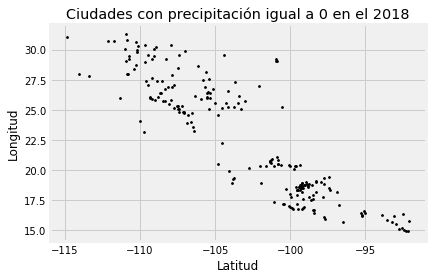

In [201]:
plt.plot(tabla8['LON'], tabla8['LAT'], 'pk', markersize = 2)
plt.xlabel('Latitud')
plt.title('Ciudades con precipitación igual a 0 en el 2018')
plt.ylabel('Longitud')
plt.savefig("mapa1.png", bbox_inches='tight')

- Ciudades con precipitación mínima en el mes de Enero del 2019

In [202]:
tabla9 = lluvias_2019[lluvias_2019['ENE']==lluvias_2019['ENE'].min()]
tabla9

,LON,LAT,EDO,CLAVE_SIH,NOMBRE,ENE,FEB,MAR,ABR,MAY,JUN,JUL,AGO
95,-93.150000,16.641944,CHIS,BOQCP,"Boquerón, Chis.",0.0,0.00,0.0,0.00,130.00,99.60,65.9,135.40
98,-92.479167,16.308333,CHIS,CASCP,"Cascajal, Chis.",0.0,0.01,1.2,1.80,130.93,174.73,68.2,118.93
99,-92.483056,15.969167,CHIS,CATARINITAS,"Catarinitas, Chis. SGT*",0.0,0.20,16.6,2.60,72.00,255.40,55.4,131.60
111,-92.755278,15.071111,CHIS,ENCRUCIJADA,"La Encrucijada, Chis. SMN*",0.0,0.00,4.4,0.20,171.60,142.00,270.2,73.40
114,-92.670000,15.330000,CHIS,ESCUINTLA,"Escuintla SMN, Chis.",0.0,25.00,1.0,18.25,387.25,350.50,175.8,490.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...
847,-97.647500,19.318056,TLAX,ECTTL,"El Carmen Tequexquitla, Tlax.",0.0,9.50,4.0,5.52,23.00,84.55,89.5,92.00
848,-97.911111,19.315833,TLAX,HMTTL,"Huamantla, Tlax.",0.0,0.01,0.0,14.01,35.20,136.80,123.0,104.80
852,-97.908056,19.200278,TLAX,ZITTL,"Zitlaltepec, Tlax.",0.0,15.50,0.0,19.50,54.00,237.01,167.0,110.50
890,-97.231944,18.922778,VER,LGRVC,"Loma Grande, Ver.",0.0,2.00,5.0,27.00,102.00,224.01,190.0,105.00


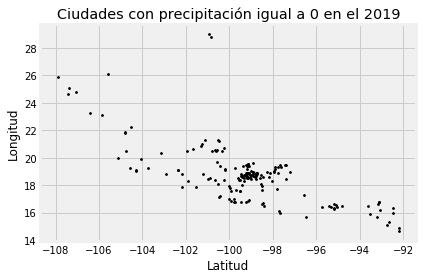

In [203]:
plt.plot(tabla9['LON'], tabla9['LAT'], 'pk', markersize = 2)
plt.xlabel('Latitud')
plt.title('Ciudades con precipitación igual a 0 en el 2019')
plt.ylabel('Longitud')
plt.savefig("mapa2.png", bbox_inches='tight')

### **Apartado 2.6**

- ¿Cuánto influye la longitud o la latitud de cada estado en la medida de la precipitación?

Para saber qué tanto influye la longitud o la latitud en cada estado en medida de la precipitación podemos hacer un código donde posicionemos las ciudades de México con los datos de lluvias en el 2018. Al posicionar las ciudades, se puede observar su precipitación de acuerdo al color, y así compararlo más fácil con otras ciudades, además de notar regiones en México donde las precipitaciones son similares. 

En los siguientes comandos se encuentran tales gráficas para cada mes. Se puede hacer distinción del valor de precipitación para cada ciudad por color. 

Para el 2018:

In [219]:
lat, lon = lluvias_2018['LAT'], lluvias_2018['LON'] # Datos de longitud y latitud

In [220]:
meses = ['ENE', 'FEB', 'MAR', 'ABR', 'MAY', 'JUN', 'JUL', 'AGO']

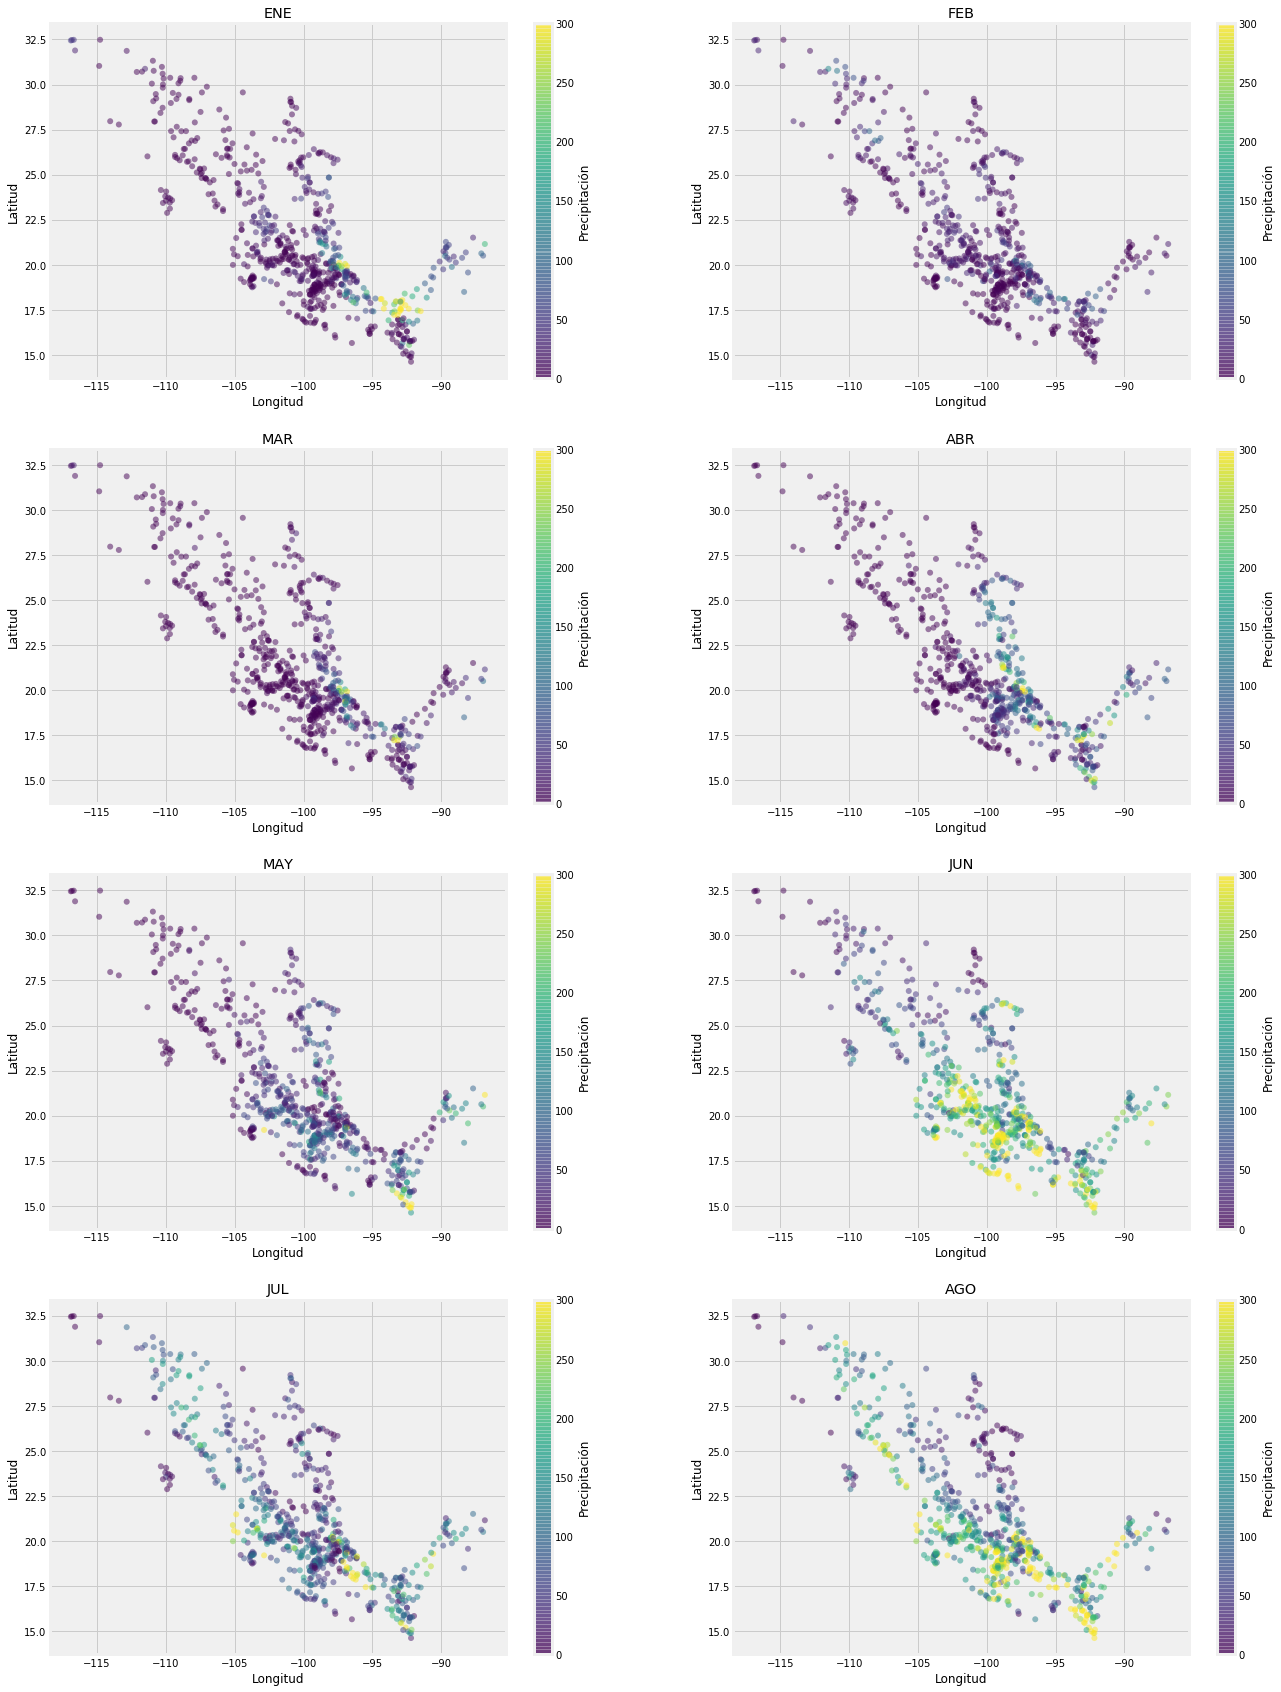

In [221]:
fig = plt.figure(figsize = (20,30))
i = 1
for mes in meses:
    plt.subplot(4, 2, i)
    plt.scatter(lon, lat, label=None,
            c=lluvias_2018[mes], cmap='viridis', linewidth=0, alpha=0.5)
    plt.axis(aspect='equal')
    plt.xlabel('Longitud')
    plt.ylabel('Latitud')
    plt.colorbar(label='Precipitación')
    plt.clim(0, 300)
    plt.title(mes);
    i = i+1
    
plt.savefig("mapa3.png", bbox_inches='tight')

Para el 2019:

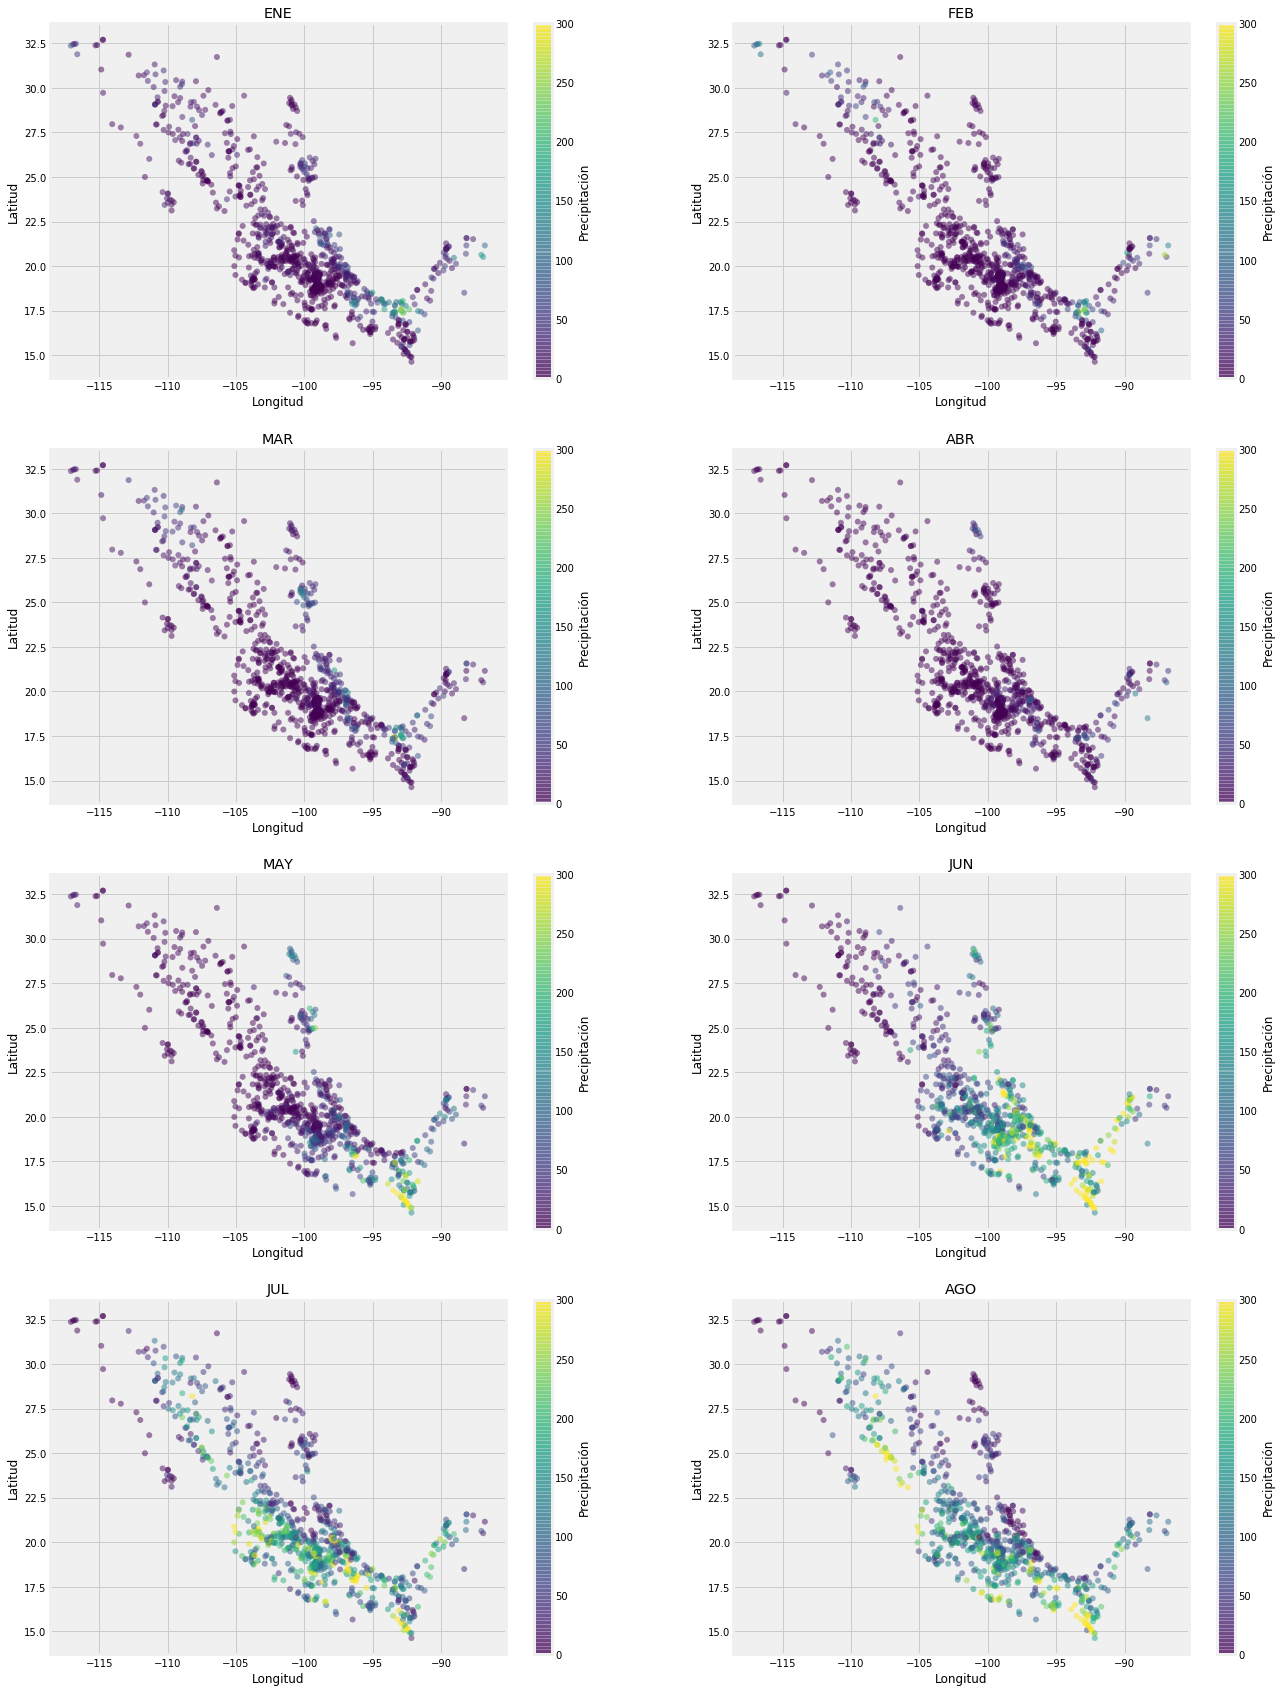

In [222]:
lat, lon = lluvias_2019['LAT'], lluvias_2019['LON'] # Datos de longitud y latitud
fig = plt.figure(figsize = (20,30))
i = 1
for mes in meses:
    plt.subplot(4, 2, i)
    plt.scatter(lon, lat, label=None,
            c=lluvias_2019[mes], cmap='viridis', linewidth=0, alpha=0.5)
    plt.axis(aspect='equal')
    plt.xlabel('Longitud')
    plt.ylabel('Latitud')
    plt.colorbar(label='Precipitación')
    plt.clim(0, 300)
    plt.title(mes);
    i = i+1
    
plt.savefig("mapa4.png", bbox_inches='tight')